In [1]:
# import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#정규화
from sklearn.preprocessing import MinMaxScaler




In [3]:
#--------------------------------------------
#임의의 점 데이터를 생성하는 make_forge()
data,label=mglearn.datasets.make_forge()

#train, test 데이터를 나눔
data_train,data_test,label_train,label_test=train_test_split(data,label,random_state=0)

#data모양을 확인
print(data[:5])
data_frame=pd.DataFrame(data,label)
print(type(data))
print(data_frame.head())
print(label[0:5])



[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]]
<class 'numpy.ndarray'>
           0         1
1   9.963466  4.596765
0  11.032954 -0.168167
1  11.541558  5.211161
0   8.692890  1.543220
0   8.106227  4.286960
[1 0 1 0 0]
C:\Users\140407\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


           0         1
1   9.963466  4.596765
1  11.541558  5.211161
1   8.309889  4.806240
1  11.930271  4.648663
1   8.348103  5.134156


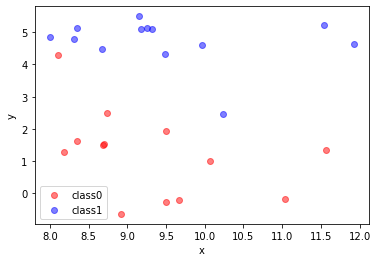

<Figure size 432x288 with 0 Axes>

In [4]:
#데이터프레임화 하여 산점도 표현
data_class_0=data_frame.loc[0]
data_class_1=data_frame.loc[1]
print(data_class_1.head())
# print(data_frame['color'])
label_c=['red' if y==1 else 'blue' for y in label]
# print(label[:5])
# print(label_c[:5])
class_0=plt.scatter(data_class_0[0],data_class_0[1],c='red',marker='o',alpha=0.5)
class_1=plt.scatter(data_class_1[0],data_class_1[1],c='blue',marker='o',alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=(class_0,class_1),labels=('class0','class1'),loc='best')
plt.show()
plt.clf()

In [5]:
# knn으로 분류 후 정확도 확인
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(data_train,label_train)
# print(data[:5]) #float형 임의의 데이터
# print(label[:5]) #1,0으로 된 라벨
print('predict ans:',label_test)
print('predict test:',knn.predict(data_test))
print('predict score:',knn.score(data_test,label_test))


predict ans: [1 0 1 0 1 1 0]
predict test: [1 0 1 0 1 0 0]
predict score: 0.8571428571428571


data_x: (40, 1)
data_y: (40,)


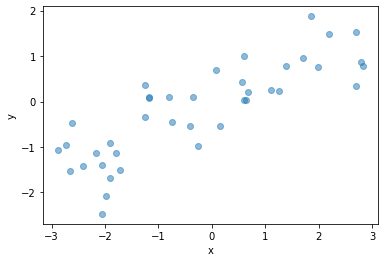

In [6]:


#--------------------------------------------
#임의의 점 데이터를 생성하는 make_wave()
data_x,data_y=mglearn.datasets.make_wave(n_samples=40)
print('data_x:',data_x.shape)
print('data_y:',data_y.shape)

# 데이터의 분포를 산점도로 확인
# data_frame=pd.DataFrame(data_x)
# print(data_frame.shape)
plt.scatter(data_x,data_y,marker='o',alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [7]:


##--------------------------------------------
#Wisconsin Breast Cancer Data
cancer=load_breast_cancer()

C_data=cancer.data
C_target=cancer.target

# #데이터의 모양을 확인 569x30
print(C_data.shape,C_target.shape)



(569, 30) (569,)


In [9]:
#데이터프레임화
cancer_df=pd.DataFrame(C_data,C_target,columns=cancer.feature_names)
cancer_df_0=cancer_df.loc[0]
cancer_df_1=cancer_df.loc[1]

#인덱스 초기화
cancer_df_0=cancer_df_0.reset_index(drop=True)
cancer_df_1=cancer_df_1.reset_index(drop=True)

#행열 바꾸기
cancer_df_0=cancer_df_0.transpose()
cancer_df_1=cancer_df_1.transpose()

#데이터의 형식을 확인
print(cancer_df.head())
print(cancer_df_0.head())
print(cancer_df_1.head())



   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
0        20.57         17.77          132.90     1326.0          0.08474   
0        19.69         21.25          130.00     1203.0          0.10960   
0        11.42         20.38           77.58      386.1          0.14250   
0        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
0           0.07864          0.0869              0.07017         0.1812   
0           0.15990          0.1974              0.12790         0.2069   
0           0.28390          0.2414              0.10520         0.2597   
0           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

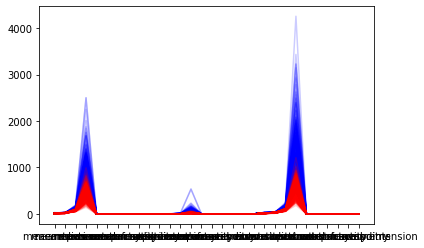

In [10]:
#데이터의 분포를 plot으로 확인
# print(cancer_df_0)
# print(cancer_df_1.shape)
plot_0=plt.plot(cancer_df_0,c='blue',alpha=0.2)
plot_1=plt.plot(cancer_df_1,c='red',alpha=0.2)
plt.show()



In [11]:
#train,test 로 나눔
c_data_train,c_data_test,c_target_train,c_target_test=train_test_split(C_data,C_target,random_state=1)

#knn fit
knn_c=KNeighborsClassifier(n_neighbors=3)
knn_c.fit(c_data_train,c_target_train)

#accuracy(k=3)
print('accuracy:',knn_c.score(c_data_test,c_target_test))



accuracy: 0.9230769230769231


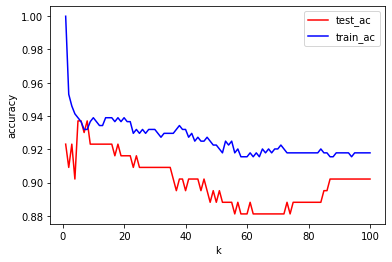

In [12]:
#신뢰도가 높은 k값 찾기
k_range=range(1,101)
accuracy_list_train=list()
accuracy_list_test=list()
for k in k_range:
    knn_c=KNeighborsClassifier(n_neighbors=k)
    knn_c.fit(c_data_train,c_target_train)
    accuracy_list_train.append(knn_c.score(c_data_train,c_target_train))
    accuracy_list_test.append(knn_c.score(c_data_test,c_target_test))

c_test_plot,=plt.plot(k_range,accuracy_list_test,c='red')    
c_train_plot,=plt.plot(k_range,accuracy_list_train,c='blue')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(handles=(c_test_plot,c_train_plot),labels=('test_ac','train_ac'),loc='best')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data=np.array([[1,-1],[2,1]])
label=np.array([-1,1])

log_reg=LogisticRegression().fit(data,label)
test_case=np.array([[0,0],[1,0],[2,0]])
line=np.linspace(0,2,10)
print(log_reg.predict(line,[0*10]))
print(line.shape)
plt.scatter(data[:,0],data[:,1],c='r',label='data')
plt.scatter(test_case[:,0],test_case[:,1],c='b',label='test_case')
plt.plot(line,log_reg.predict(line),c='g',label='pred')

plt.legend()
plt.show()



TypeError: predict() takes 2 positional arguments but 3 were given